<a href="https://colab.research.google.com/github/ayushanand18/pyobis/blob/bio-mapping/notebooks/biodiversity_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biodiversity mapping

Search for the order Scleractinia and extract all records. We will use `pyobis` to fetch data and then visualize.

Searching the order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363) and drill down to all species.

AphiaID 1363 (urn:lsid:marinespecies.org:taxname:1363)

## installing pyobis

In [1]:
try:
  import pyobis
except:
  %pip -q install pyobis
  import pyobis

## importing modules

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
try:
  import geoplot
except:
  %pip -q install geoplot
  import geoplot

In [4]:
try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

In [5]:
from pyobis.occurrences import OccQuery

**Known Bug**: Need to reinstall shapely on Google Colab since it causes crash. And then restart once.

In [6]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.4
Uninstalling Shapely-1.8.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 3.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669423 sha256=5cd2a878c5a9a011d0ec52f57602d5642db06755fa2c30352921c0b2cd87297a
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b

### importing other modules
The below modules will be used when querying through the dynamic map (utilising widgets).

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## grabbing the data

Since our analysis will be highly dependent on the depth parameter, we will choose only non NaN values.

In [6]:
occ = OccQuery()

Let us also define the specific range of depth we are interested in.

In [7]:
STARTDEPTH = 0
ENDDEPTH = 30

In [8]:
# it returns a pandas DataFrame object
df = occ.search(taxonid=1363, startdepth=STARTDEPTH, enddepth=ENDDEPTH)


Fetched 526647 records.


In [ ]:
# let's see what we got
df.head()

,brackish,date_year,scientificNameID,year,scientificName,coordinateUncertaintyInMeters,absence,dropped,genusid,aphiaID,...,forma,formaid,materialSampleID,taxonConceptID,infraspecificEpithet,recordedByID,variety,varietyid,sex,establishmentMeans
0,False,2009.0,urn:lsid:marinespecies.org:taxname:206938,2009,Pocillopora,100.0,False,False,206938.0,206938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,2008.0,urn:lsid:marinespecies.org:taxname:207470,2008,Leptastrea purpurea,100.0,False,False,204278.0,207470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,2000.0,urn:lsid:marinespecies.org:taxname:291119,2000,Stephanocoenia intersepta,NaN,False,False,267860.0,291119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,2009.0,urn:lsid:marinespecies.org:taxname:291119,2009,Stephanocoenia intersepta,NaN,False,False,267860.0,291119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,2010.0,urn:lsid:marinespecies.org:taxname:207225,2010,Porites lobata,100.0,False,False,206485.0,207225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## visualization

### 1. year-wise distribution
Let us see the year-wise distribution of records.

In [14]:
# setting up seaborn
sns.set(style="darkgrid", rc={'figure.figsize':(25,8)})
# getting the basemap
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

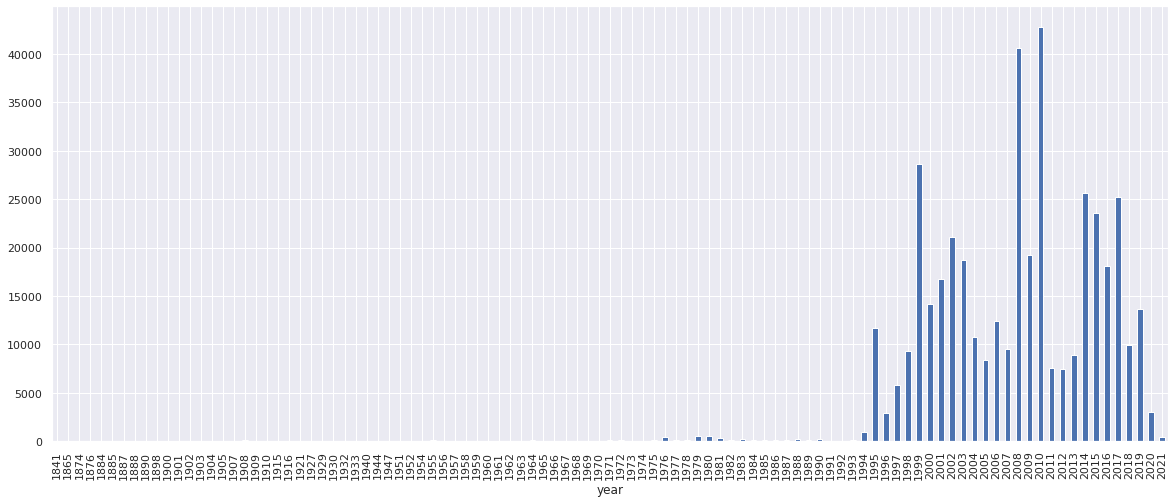

In [ ]:
ax = df.groupby("year").date_mid.count().plot.bar(figsize = (20,8))

We can see from the plot that 2010 has got the highest number of records. Although there is a lot of variation yet the number of records has risen significatly after 1995 in comparison to the earlier years where the data is almost negligible.

### based on point density

In [9]:
# convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.decimalLongitude, df.decimalLatitude),
    crs="EPSG:4326")

In [10]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (15,10)

In [11]:
try:
  import regionmask
except:
  %pip -q install regionmask
  import regionmask

     |████████████████████████████████| 59 kB 2.8 MB/s 


In [12]:
basins = regionmask.defined_regions.natural_earth_v5_0_0.ocean_basins_50.to_geodataframe()
basins = basins.dissolve()

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:709: UserWarning: Could not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Could not set plot extent successfully due to numerical instability. '
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is dep

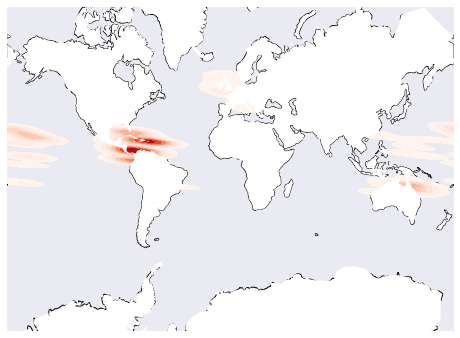

In [15]:
ax = geoplot.polyplot(countries, projection=geoplot.crs.WebMercator())
geoplot.kdeplot(gdf, cmap='Reds', shade=True, clip=basins, ax=ax);

### with latitude and longitude stacked side-by-side

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(17,9.1), gridspec_kw={'width_ratios': [16, 1], 'height_ratios': [1, 8.7]})
df["decimalLongitude"].astype(int).plot.hist(ax=axes[0][0], bins=50, range=(-180, 180))
axes[0][0].set_title("Longitude")

axes[0][1].set_facecolor('white')
axes[0][1].tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)

axes[1][0] = geoplot.polyplot(countries, projection=geoplot.crs.PlateCarree())
geoplot.kdeplot(gdf, cmap='Reds', shade=True, clip=basins, ax=axes[1][0]);

axes[1][0].set_xlim(-180,180)
axes[1][0].set_ylim(-90, 90)
axes[1][0].set_title("Occurrence Records with heatmap based point density.")
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
df["decimalLatitude"].astype(int).plot.hist(orientation='horizontal', ax=axes[1][1], bins=50, range=(-90, 90))

axes[1][1].set_title("Latitude")
plt.show()

--------------------
--------------------

## Dynamic Plot

In [ ]:
# defining areas of outputs
map_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 4px 15px 4px'})
map_out.append_stdout('map output\n')

graph_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 0 15px 4px'})
graph_out.append_stdout('graph output\n')

zoom_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 4px 15px 0'})
zoom_out.append_stdout('set a (lat, lon) to view zoom view\n')

In [ ]:
# setting the buttons and fields
taxonInput = widgets.IntText(description="Enter Taxon ID", value = 127405)
taxonButton = widgets.Button(description="Fetch Data")
graph = widgets.Button(description="Show graph")
map = widgets.Button(description="Show map")
zoom_button = widgets.Button(description="Open zoomed")
ilats = widgets.IntText(description="Lat.")
ilons = widgets.IntText(description="Long.")
zoom = widgets.IntText(description="Zoom by:", value=20)

In [ ]:
# defining click events
def on_taxon_updated(b):
  req = occ.search(taxonid = taxonInput.value, startdepth = -2000)
  df = pd.DataFrame(req["results"])

@map_out.capture()
def on_map_clicked(b):
  map_out.clear_output()
  countries.plot(color="grey", figsize=(11,6))
  plt.title("records")
  wmap = plt.scatter(data=df, x="decimalLongitude", y="decimalLatitude", c=df["depth"], cmap="coolwarm")
  plt.xlabel("")
  plt.ylabel("")
  plt.colorbar(wmap)
  plt.show()

@zoom_out.capture()
def on_zoom_clicked(b):
  zoom_out.clear_output()
  ax = countries.plot(color="lightgrey")
  plt.scatter(data=df, x="decimalLongitude", y="decimalLatitude", c=df["depth"], cmap="coolwarm")
  plt.rc('figure',figsize=(5,5))
  plt.xlabel("")
  plt.ylabel("")
  plt.title(f"zoomed around {ilons.value, ilats.value}")
  ax.set_xlim(ilons.value-zoom.value,ilons.value+zoom.value)
  ax.set_ylim(ilats.value-zoom.value,ilats.value+zoom.value)
  plt.show()

@graph_out.capture()
def on_graph_clicked(b):
  graph_out.clear_output()
  plt.figure(figsize=(5,2.2))
  plt.title("records histogram");
  sns.histplot(df["decimalLatitude"].astype(int), kde=True)
  plt.figure(figsize=(5,2.2))
  sns.histplot(df["decimalLongitude"].astype(int), kde=True)
  graph_out.append_stdout(plt.show())

taxonButton.on_click(on_taxon_updated)
graph.on_click(on_graph_clicked)
map.on_click(on_map_clicked)
zoom_button.on_click(on_zoom_clicked)

Let's see the widgets.

In [ ]:
widgets.VBox([
    widgets.HBox([
        taxonInput, taxonButton
    ]),
    widgets.VBox([
      widgets.HBox([zoom_out, map_out, graph_out]),
        widgets.VBox([
          widgets.HBox([ilons,ilats, zoom]),
            widgets.HBox([map, zoom_button, graph])
      ])
  ])
])